<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install scikit-learn

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 162.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 163.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 137.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 165.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 174.7 MB/s eta 0:00:0000:01


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [2]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-05-31 15:19:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  49.8MB/s    in 3.1s    

2025-05-31 15:19:39 (49.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Load the data


In [3]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [4]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


In [5]:
# Step 1: Map age ranges to approximate midpoints
age_midpoints = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Step 2: Create new numeric age column
df['AgeNumeric'] = df['Age'].map(age_midpoints)

In [6]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

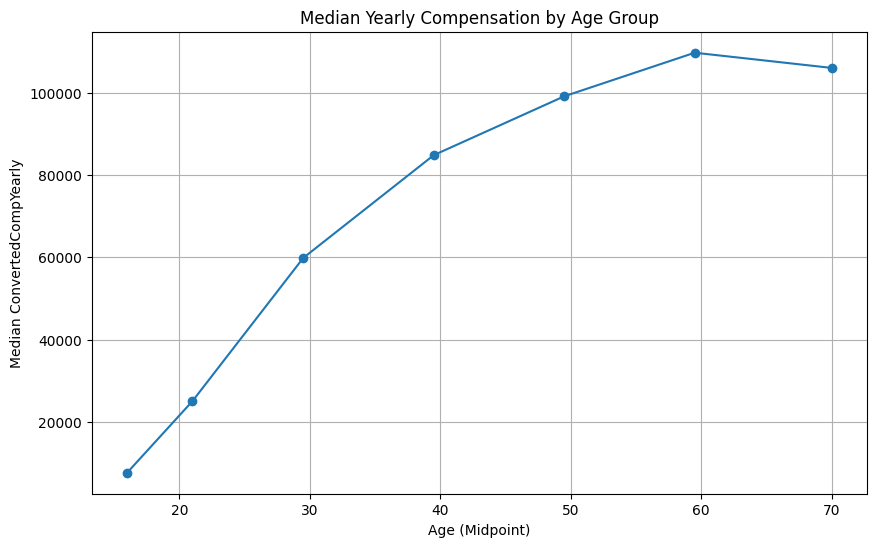

In [7]:
## Write your code here
import matplotlib.pyplot as plt

# Group by AgeNumeric and calculate the median of ConvertedCompYearly
median_comp_by_age = df.groupby('AgeNumeric')['ConvertedCompYearly'].median().sort_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker='o')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Median ConvertedCompYearly')
plt.grid(True)
plt.show()


##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


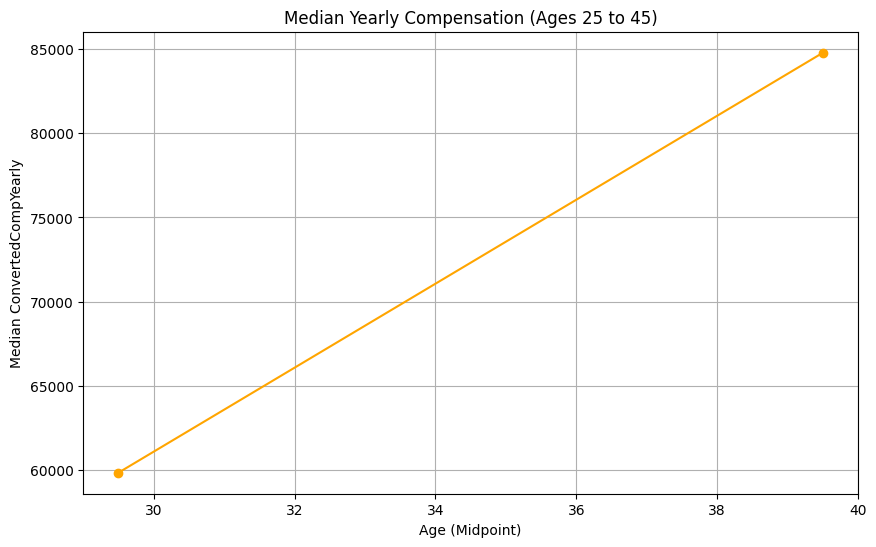

In [8]:
## Write your code here
# Filter for age midpoints between 25 and 45
filtered_df = df[(df['AgeNumeric'] >= 25) & (df['AgeNumeric'] <= 45)]

# Group and plot
median_filtered = filtered_df.groupby('AgeNumeric')['ConvertedCompYearly'].median().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(median_filtered.index, median_filtered.values, marker='o', color='orange')
plt.title('Median Yearly Compensation (Ages 25 to 45)')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Median ConvertedCompYearly')
plt.grid(True)
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


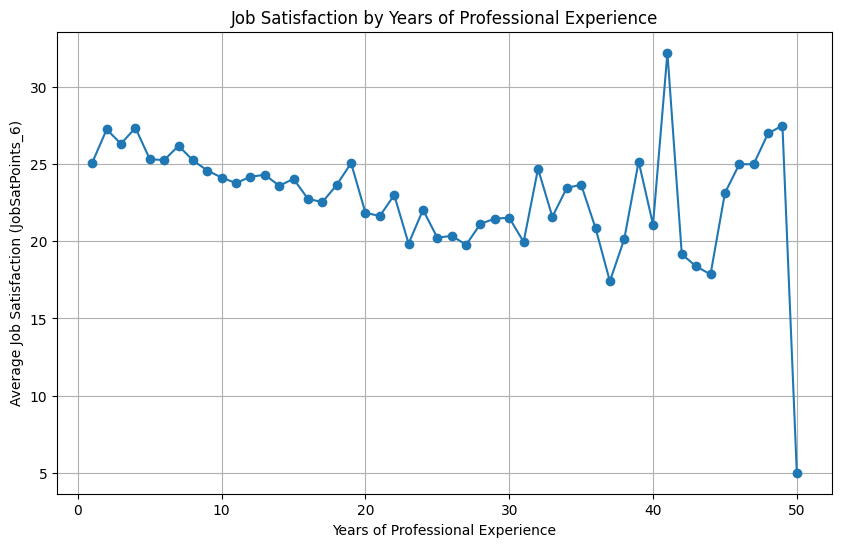

In [9]:
## Write your code here
import matplotlib.pyplot as plt
import numpy as np

# Convert YearsCodePro to numeric, coerce errors (like 'Less than 1 year' or 'More than 50 years')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop NaNs in either column
experience_satisfaction = df[['YearsCodePro', 'JobSatPoints_6']].dropna()

# Group by experience and calculate the mean job satisfaction
satisfaction_by_experience = (
    experience_satisfaction
    .groupby('YearsCodePro')['JobSatPoints_6']
    .mean()
    .sort_index()
)

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(satisfaction_by_experience.index, satisfaction_by_experience.values, marker='o')
plt.title('Job Satisfaction by Years of Professional Experience')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()


Here are a few insights and interpretations that stand out:

---

### **1. General Downward Trend**

There’s a **gradual decline** in job satisfaction from around 1–10 years through 30+ years of experience.

* **Possible interpretation**: Early-career professionals may start with more enthusiasm, optimism, and a sense of growth.
* Over time, factors such as burnout, plateauing roles, or slower advancement could dampen satisfaction.

---

### **2. The Sharp Drop at 50 Years**

This dramatic plunge in job satisfaction for people with **50 years of experience** is a clear outlier.

* **Likely explanation**: This group is probably **very small** — maybe just a handful of respondents — so the median or mean satisfaction is not reliable.
* **Statistical noise**: These values can be disproportionately affected by even one or two people giving low scores.

---

### **3. Spikes Around 40–45 Years**

There’s an interesting **uptick and peak around 41 years**, followed by variability.

* **Possibility**: These could be long-term veterans who’ve found stability or leadership roles they enjoy.
* Alternatively, it might reflect another **small sample effect**, with just a few very satisfied individuals skewing the mean.

---

### **Takeaway: Consider Bin Aggregation**


/tmp/ipykernel_300/43415279.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  satisfaction_by_bin = binned_df.groupby('ExperienceBin')['JobSatPoints_6'].mean()


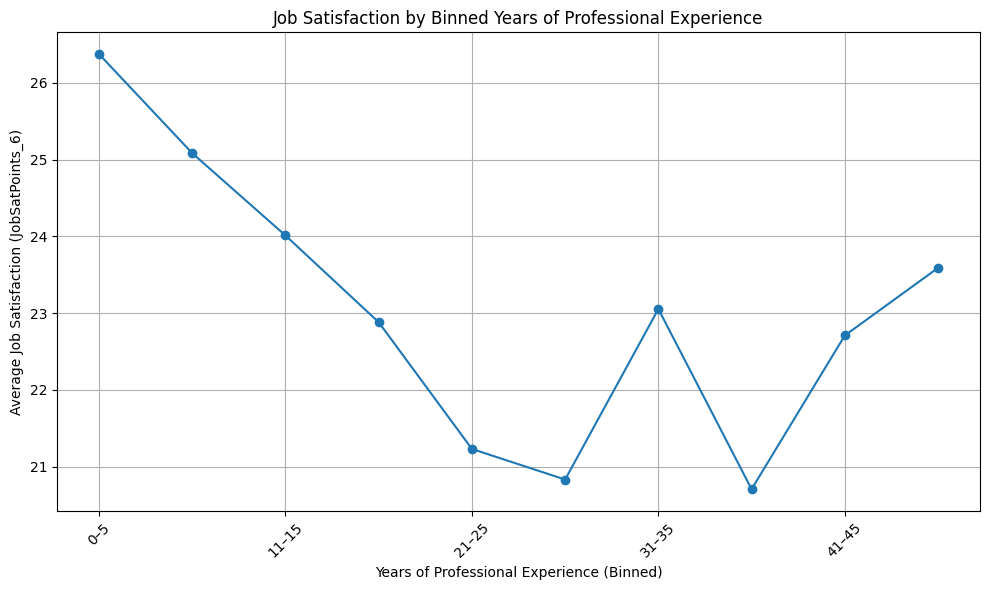

In [10]:
# Define bins and labels
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0–5', '6–10', '11–15', '16–20', '21–25', '26–30', 
          '31–35', '36–40', '41–45', '46–50']

# Create a new column for binned experience
df['ExperienceBin'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=True)

# Drop rows with missing values in either column
binned_df = df[['ExperienceBin', 'JobSatPoints_6']].dropna()

# Group by experience bin and calculate mean job satisfaction
satisfaction_by_bin = binned_df.groupby('ExperienceBin')['JobSatPoints_6'].mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
satisfaction_by_bin.plot(kind='line', marker='o')
plt.title('Job Satisfaction by Binned Years of Professional Experience')
plt.xlabel('Years of Professional Experience (Binned)')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


That's a thoughtful observation — and your personal reflection aligns well with what some research and career trend data suggest.

---

### **Career Change Around 20 Years: A Recognized Pattern**

Yes, several studies and surveys have noted that **mid- to late-career transitions** often cluster around the **15–20 year** mark. Some relevant findings:

#### 1. **"Second Act" Careers Are Common**

* The U.S. Bureau of Labor Statistics (BLS) and surveys like those from the AARP and Indeed have found that many workers **pivot into new fields** in their 40s and 50s.
* Common motivations include:

  * Burnout or feeling they've "topped out"
  * Seeking more flexibility or work-life balance
  * A desire to make a greater impact or shift values
  * Learning fatigue or stagnation (i.e., "I've refined this craft as much as I can")

#### 2. **The "U-Shaped" Curve of Job Satisfaction**

* Several longitudinal studies (e.g., by economists Andrew Oswald and David Blanchflower) show that **job satisfaction dips in mid-career**, often reaching a low point in one's 40s or early 50s, before rising again.
* That’s exactly what your graph suggests: job satisfaction declines through 20–25 years of experience, then starts trending upward.

#### 3. **Career Counseling Literature**

* Career development theory (Super, Levinson, etc.) posits that mid-life is a time when people re-evaluate and often shift career goals.
* You might be in what they’d call a **“reinvention” phase**, where your deep expertise gives you the freedom to pivot.

---

### 🎯 In Your Case:

You’re not alone — making a shift after 20 years of teaching, especially into something intellectually stimulating like **data science** or **AI training**, makes complete sense.

Your current journey even mirrors what this dataset shows: a **trough in satisfaction around 20–25 years**, with some bounce-back as people re-align their careers.

### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


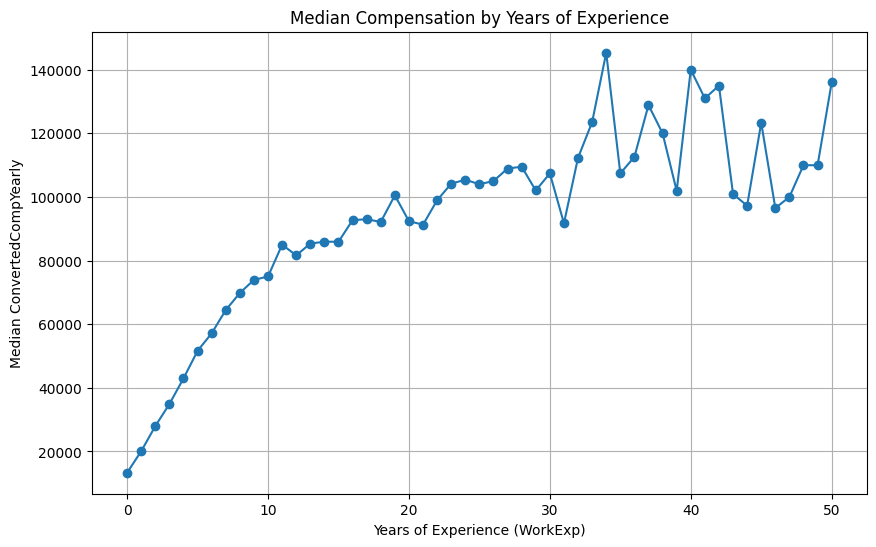

In [11]:
## Write your code here
# Convert WorkExp to numeric in case of strings like "More than 50 years"
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop missing values in compensation or experience
comp_by_exp = df[['WorkExp', 'ConvertedCompYearly']].dropna()

# Group by WorkExp and calculate median compensation
median_comp = comp_by_exp.groupby('WorkExp')['ConvertedCompYearly'].median()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(median_comp.index, median_comp.values, marker='o')
plt.title('Median Compensation by Years of Experience')
plt.xlabel('Years of Experience (WorkExp)')
plt.ylabel('Median ConvertedCompYearly')
plt.grid(True)
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


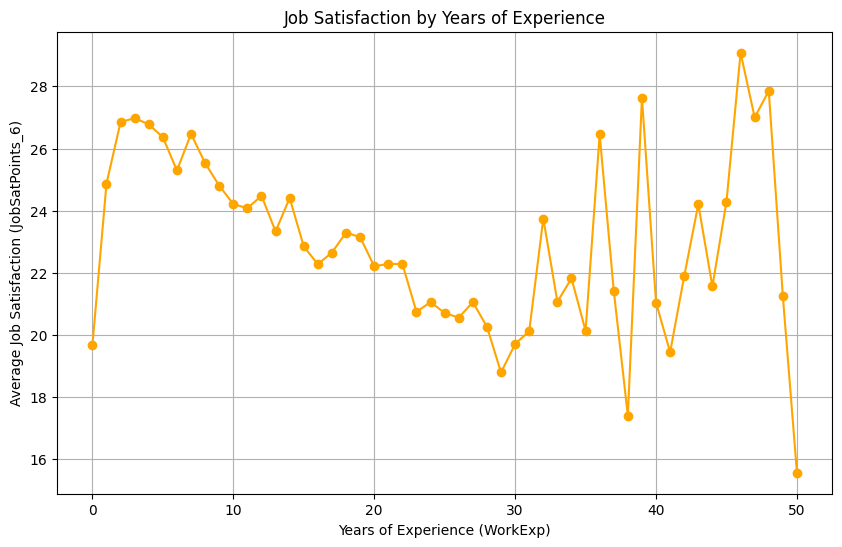

In [13]:
## Write your code here
# Drop missing values
sat_by_exp = df[['WorkExp', 'JobSatPoints_6']].dropna()

# Group by WorkExp and calculate average job satisfaction
mean_satisfaction = sat_by_exp.groupby('WorkExp')['JobSatPoints_6'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mean_satisfaction.index, mean_satisfaction.values, marker='o', color='orange')
plt.title('Job Satisfaction by Years of Experience')
plt.xlabel('Years of Experience (WorkExp)')
plt.ylabel('Average Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()


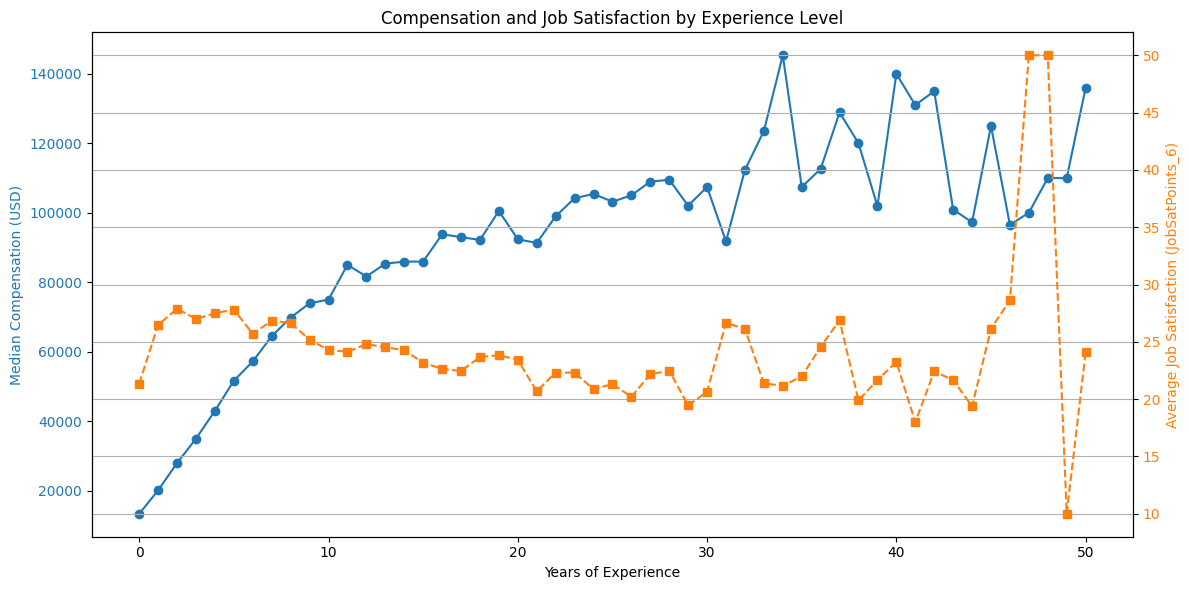

In [14]:
import matplotlib.pyplot as plt

# Ensure numeric conversion for WorkExp if not done already
df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')

# Drop missing values for both compensation and satisfaction
combined_df = df[['WorkExp', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Group by WorkExp
grouped = combined_df.groupby('WorkExp')

# Calculate metrics
median_comp = grouped['ConvertedCompYearly'].median()
mean_satisfaction = grouped['JobSatPoints_6'].mean()

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot compensation on left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Years of Experience')
ax1.set_ylabel('Median Compensation (USD)', color=color1)
ax1.plot(median_comp.index, median_comp.values, color=color1, marker='o', label='Median Compensation')
ax1.tick_params(axis='y', labelcolor=color1)

# Create a second y-axis
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Average Job Satisfaction (JobSatPoints_6)', color=color2)
ax2.plot(mean_satisfaction.index, mean_satisfaction.values, color=color2, marker='s', linestyle='--', label='Job Satisfaction')
ax2.tick_params(axis='y', labelcolor=color2)

# Add title and grid
plt.title('Compensation and Job Satisfaction by Experience Level')
fig.tight_layout()
plt.grid(True)
plt.show()


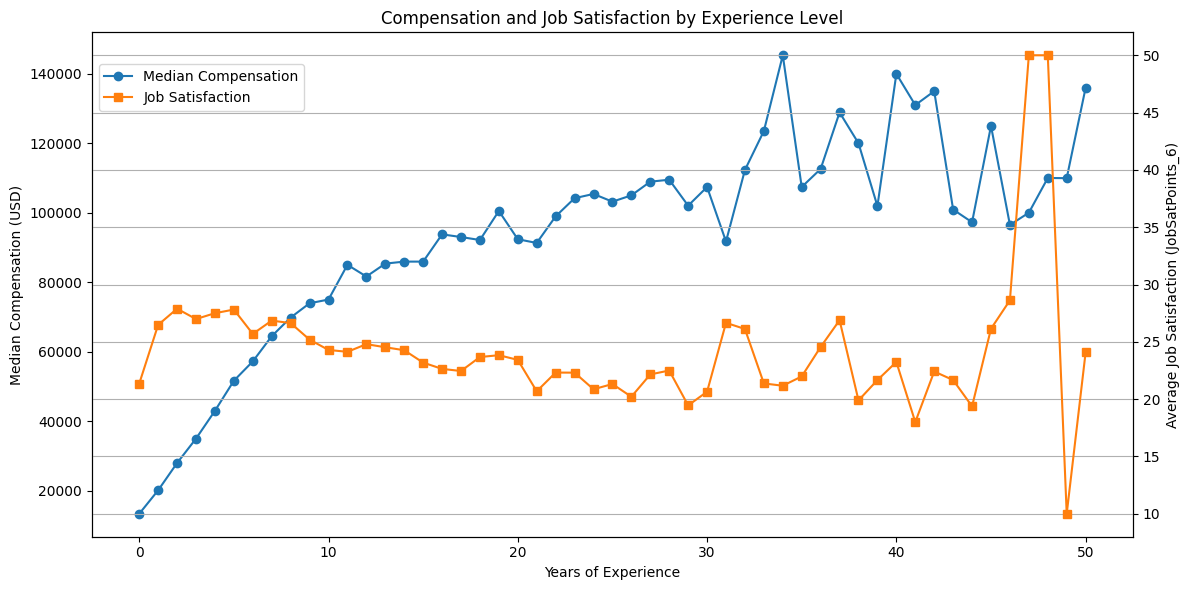

In [18]:
import matplotlib.pyplot as plt

# Create dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot compensation on left y-axis
color1 = 'tab:blue'
ax1.set_xlabel('Years of Experience')
ax1.set_ylabel('Median Compensation (USD)', color='black')
comp_line, = ax1.plot(median_comp.index, median_comp.values, color=color1, marker='o', label='Median Compensation')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelcolor='black')

# Create a second y-axis for satisfaction
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('Average Job Satisfaction (JobSatPoints_6)', color='black')
sat_line, = ax2.plot(mean_satisfaction.index, mean_satisfaction.values, color=color2, marker='s', linestyle='-', label='Job Satisfaction')
ax2.tick_params(axis='y', labelcolor='black')

# Add title and grid
plt.title('Compensation and Job Satisfaction by Experience Level')
fig.tight_layout()
plt.grid(True)

# Add legend in upper left (handles must be collected from both axes)
lines = [comp_line, sat_line]
labels = [line.get_label() for line in lines]
#ax1.legend(lines, labels, loc='upper left')
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 0.95))

plt.show()



In [19]:
# Count respondents in each age group
age_counts = df['Age'].value_counts(normalize=True).sort_index() * 100

# Display as percentages rounded to 1 decimal place
age_percentages = age_counts.round(1)

# Print the result
print("Percentage of Respondents by Age Group:")
print(age_percentages)


Percentage of Respondents by Age Group:
Age
18-24 years old       21.5
25-34 years old       36.5
35-44 years old       22.8
45-54 years old        9.5
55-64 years old        3.9
65 years or older      1.2
Prefer not to say      0.5
Under 18 years old     3.9
Name: proportion, dtype: float64


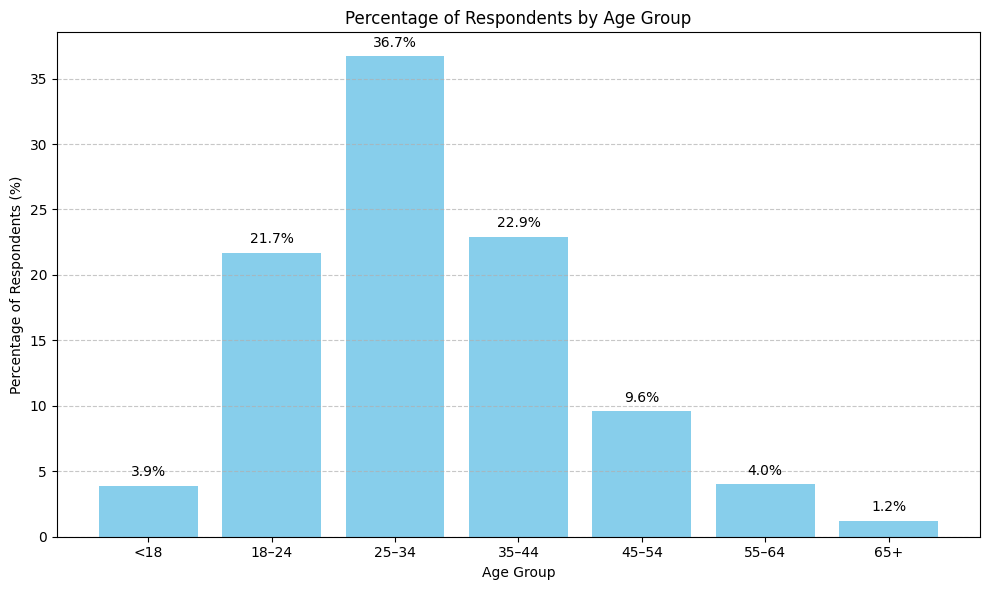

In [20]:
import matplotlib.pyplot as plt

# Define the custom order and shortened labels
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old',
    '65 years or older'
]

label_map = {
    'Under 18 years old': '<18',
    '18-24 years old': '18–24',
    '25-34 years old': '25–34',
    '35-44 years old': '35–44',
    '45-54 years old': '45–54',
    '55-64 years old': '55–64',
    '65 years or older': '65+'
}

# Filter and normalize (drop 'Prefer not to say')
age_filtered = df['Age'][df['Age'] != 'Prefer not to say']
age_counts = age_filtered.value_counts(normalize=True)

# Reindex to ensure the correct order
age_percentages = (age_counts.reindex(age_order) * 100).round(1)

# Plot
plt.figure(figsize=(10, 6))
x_labels = [label_map[age] for age in age_percentages.index]
bars = plt.bar(x_labels, age_percentages.values, color='skyblue')

# Annotate bars with percentage values
for bar, pct in zip(bars, age_percentages.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{pct}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Percentage of Respondents by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Respondents (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
